In [1]:
# Part 1 - Building the FCN
#importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras import optimizers
import tensorflow as tf

In [2]:
# Initialing the FCN
classifier = Sequential()

In [3]:
# Step 1 - Creating model input
classifier.add(tf.keras.Input(shape=(64, 64, 3)))

In [4]:
#Step 2 - Flattening
classifier.add(Flatten())


In [5]:
#Step 4 - Full Connection

classifier.add(Dense(512, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(512, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(256, activation = 'relu'))
#classifier.add(Dropout(0.3))
classifier.add(Dense(24, activation = 'softmax'))

In [6]:
#Compiling The Designed FCNN model
classifier.compile(
              optimizer = optimizers.Adam(lr = 0.00001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


C:\Users\shalm\aasd4011-winter-2023\venv\tensorflow_cpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
#Part 2 Fittting the FCNN to the dataset
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)



In [8]:
training_set = train_datagen.flow_from_directory(
        'C:/Users/shalm/Desktop/DL2/DatasetFinalPranavAmin/training_set/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')


Found 7487 images belonging to 24 classes.


In [9]:
validation_set = val_datagen.flow_from_directory(
        'C:/Users/shalm/Desktop/DL2/DatasetFinalPranavAmin/validation_set/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')


Found 2140 images belonging to 24 classes.


In [15]:
model = classifier.fit_generator(
        training_set,
        steps_per_epoch=234,
        epochs=120,
        verbose=1,
        validation_data= validation_set,
        validation_steps= 67)

Epoch 1/120
  2/234 [..............................] - ETA: 11s - loss: 0.2417 - accuracy: 0.9062

C:\Users\shalm\AppData\Local\Temp\ipykernel_30596\1346376570.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model = classifier.fit_generator(


234/234 [==============================] - 10s 44ms/step - loss: 0.1859 - accuracy: 0.9496 - val_loss: 0.6742 - val_accuracy: 0.8061
Epoch 2/120
234/234 [==============================] - 10s 44ms/step - loss: 0.1801 - accuracy: 0.9491 - val_loss: 0.6604 - val_accuracy: 0.8070
Epoch 3/120
234/234 [==============================] - 10s 44ms/step - loss: 0.1708 - accuracy: 0.9515 - val_loss: 0.6644 - val_accuracy: 0.8112
Epoch 4/120
234/234 [==============================] - 10s 44ms/step - loss: 0.1681 - accuracy: 0.9504 - val_loss: 0.6886 - val_accuracy: 0.8033
Epoch 5/120
234/234 [==============================] - 10s 44ms/step - loss: 0.1620 - accuracy: 0.9545 - val_loss: 0.6685 - val_accuracy: 0.8089
Epoch 6/120
234/234 [==============================] - 10s 44ms/step - loss: 0.1569 - accuracy: 0.9541 - val_loss: 0.6662 - val_accuracy: 0.8070
Epoch 7/120
234/234 [==============================] - 10s 44ms/step - loss: 0.1590 - accuracy: 0.9550 - val_loss: 0.6788 - val_accuracy: 0.80

234/234 [==============================] - 10s 44ms/step - loss: 0.0265 - accuracy: 0.9936 - val_loss: 0.6929 - val_accuracy: 0.8509
Epoch 114/120
234/234 [==============================] - 10s 45ms/step - loss: 0.0271 - accuracy: 0.9935 - val_loss: 0.6969 - val_accuracy: 0.8453
Epoch 115/120
234/234 [==============================] - 10s 44ms/step - loss: 0.0253 - accuracy: 0.9939 - val_loss: 0.7299 - val_accuracy: 0.8416
Epoch 116/120
234/234 [==============================] - 10s 44ms/step - loss: 0.0244 - accuracy: 0.9941 - val_loss: 0.7233 - val_accuracy: 0.8360
Epoch 117/120
234/234 [==============================] - 10s 44ms/step - loss: 0.0227 - accuracy: 0.9945 - val_loss: 0.6981 - val_accuracy: 0.8477
Epoch 118/120
234/234 [==============================] - 10s 44ms/step - loss: 0.0260 - accuracy: 0.9923 - val_loss: 0.7088 - val_accuracy: 0.8435
Epoch 119/120
234/234 [==============================] - 10s 44ms/step - loss: 0.0276 - accuracy: 0.9925 - val_loss: 0.7332 - val_ac

In [16]:
'''#Saving the model
import h5py'''
classifier.save('C:/Users/shalm/Desktop/DL2/Handgesture_Final_FCN.h5')

print(classifier.summary())

print(model.history.keys())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 512)               6291968   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 24)                6

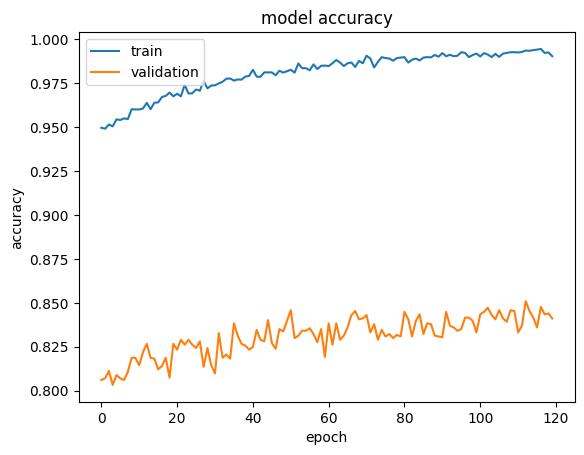

In [17]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model.history['accuracy'], label = "Train accuarcy")
plt.plot(model.history['val_accuracy'],label = "Val accuarcy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

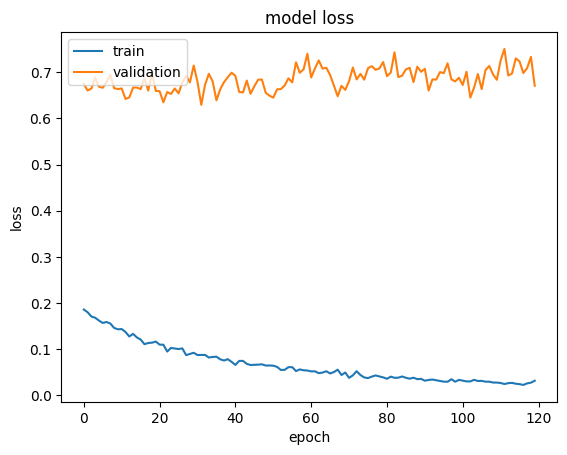

In [18]:
# summarize history for loss

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [19]:
# "Accuracy from test sets"
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'C:/Users/shalm/Desktop/DL2/DatasetFinalPranavAmin/test_set/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
loss,accuracy = classifier.evaluate_generator(test_set, steps=56)
print("Testing accuracy:",accuracy)

Found 1069 images belonging to 24 classes.


C:\Users\shalm\AppData\Local\Temp\ipykernel_30596\1827263304.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,accuracy = classifier.evaluate_generator(test_set, steps=56)


Testing accuracy: 0.821328341960907
